In [3]:
import os
import torch
import pandas as pd
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from random import randint
from os import listdir

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

dataset_file = 'Dataset/dataset_index.csv'
textures_file = 'Dataset/textures_index.csv'
fruits_path = 'Dataset/fruits-360'
textures_path = 'Dataset/textures'

ImportError: cannot import name 'LinearNDInterpolator'

In [2]:
names = []
for fruit_class in os.listdir(os.path.join(fruits_path, 'Training')):
    names.append(str(fruit_class))

In [3]:
if (os.stat(dataset_file).st_size == 0):  
    folders_to_add = ['Training', 'Validation']

    df = pd.DataFrame(columns=['Class', 'Path'])

    for folder in folders_to_add:
        if 'DS' not in folder:
            for fruit_class in os.listdir(os.path.join(fruits_path, folder)):
                if 'DS' not in fruit_class:
                    for name in os.listdir(os.path.join(fruits_path, folder, fruit_class)):
                        df = df.append({'Class': str(fruit_class), 'Path': str(os.path.join(fruits_path,folder, fruit_class, name))}, ignore_index=True )
    df.to_csv(dataset_file, index=False)
    del(df)

if (os.stat(textures_file).st_size == 0):  
    df = pd.DataFrame(columns=['Path'])

    for t in os.listdir(textures_path):
        df = df.append({'Path': str(os.path.join(textures_path,t))}, ignore_index=True )
    df.to_csv(textures_file, index=False)
    
    del(df)

In [4]:
class FruitsDataset(Dataset):
    """Fruits dataset."""

    def __init__(self, csv_file, cl, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        aux = pd.read_csv(csv_file)
        self.fruits_idx = aux[aux['Class'] == cl]
        self.transform = transform

    def __len__(self):
        return len(self.fruits_idx)

    def __getitem__(self, idx):
        img_name = self.fruits_idx.iloc[idx, 1]
        image = io.imread(img_name)

        if self.transform:
            image = self.transform(image)

        return image
    
class TexturesDataset(Dataset):

    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.textures = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.textures)

    def __getitem__(self, idx):
        img_name = self.textures.iloc[idx, 0]
        image = io.imread(img_name)

        if self.transform:
            image = self.transform(image)

        return image

In [5]:
class ChangeBackground(object):


    def __init__(self, textures):
        self.textures = textures

    def __call__(self, image):
        h, w = image.shape[:2]
        maxvals = len(self.textures)
        text_idx = randint(0,maxvals-1)
        image = np.where(image >= [240, 240, 240], self.textures[text_idx], image)
        '''for i in range(h):
            for j in range(w):
                if (image[i,j,:] >= [245, 245, 245]).all():
                    image[i,j,:] = self.textures[text_idx][i,j,:]'''
        return image

In [6]:
fruits_avocado = FruitsDataset(csv_file=dataset_file, cl='Avocado')
fruits_orange = FruitsDataset(csv_file=dataset_file, cl='Orange')
textures = TexturesDataset(csv_file=textures_file)
test = FruitsDataset(csv_file=dataset_file, cl='Pineapple', transform = transforms.Compose([ChangeBackground(textures)]))

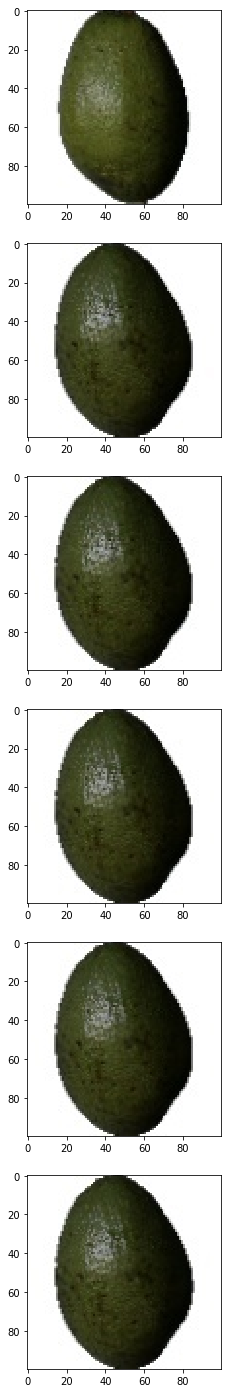

In [7]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10,25))

for i in range(len(fruits_avocado)):
    sample = fruits_avocado[i]
    ax[i].imshow(sample)
    if i == 5:
        plt.show()
        break

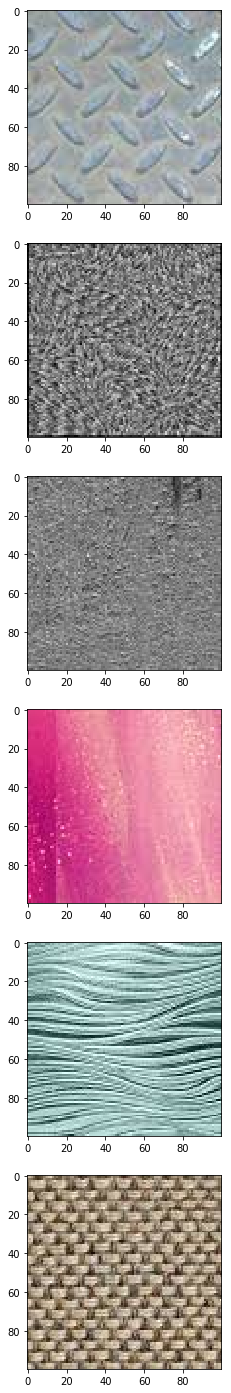

In [8]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10,25))

for i in range(len(textures)):
    sample = textures[i]
    ax[i].imshow(sample)
    if i == 5:
        plt.show()
        break

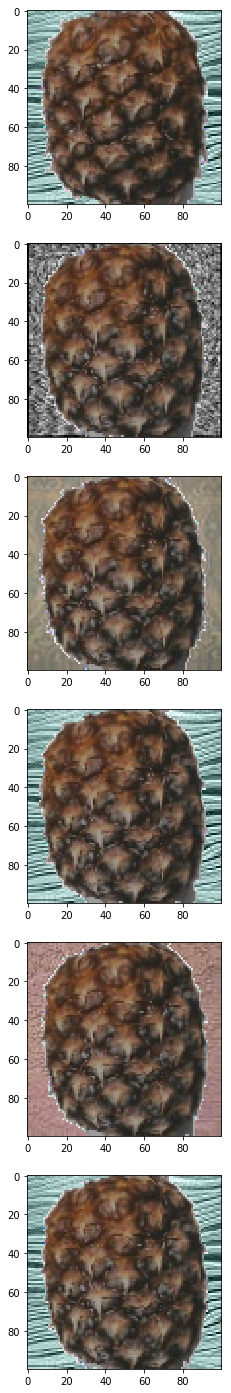

In [12]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10,25))

for i in range(len(test)):
    sample = test[i]
    ax[i].imshow(sample)
    if i == 5:
        plt.show()
        break